### This is a general overview of data used for my first Machine Learning class.
Trying out some data visualization

Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("../Datasets/train (1).csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# knowing the shape of the dataset
df.shape

(1460, 81)

In [6]:
# an overview of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# getting the standard description of the values in the data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df["SalePrice"].describe() # describing the target variable

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

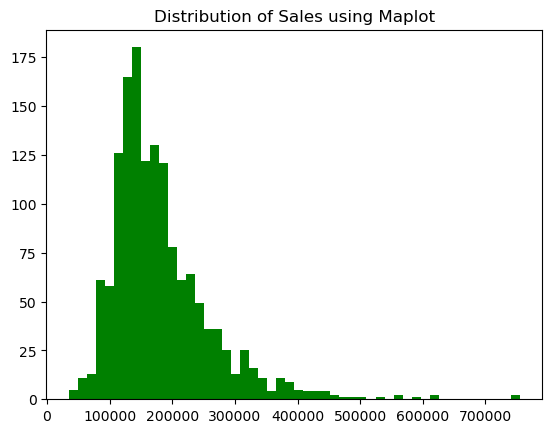

In [22]:
plt.hist(df["SalePrice"], color="g", bins=50)
plt.title("Distribution of Sales using Maplot")

plt.show()

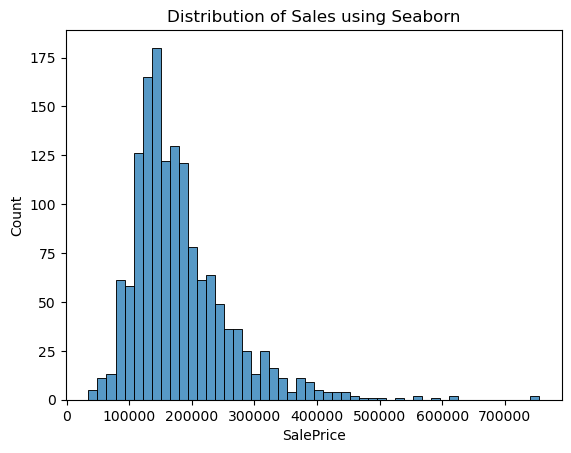

In [23]:
sns.histplot(df["SalePrice"], bins=50)
plt.title("Distribution of Sales using Seaborn")
plt.show()

In [25]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [57]:
price_by_condition = df.groupby("SalePrice")["MSZoning"].count().reset_index()

price_by_condition

,SalePrice,MSZoning
0,34900,1
1,35311,1
2,37900,1
3,39300,1
4,40000,1
...,...,...
658,582933,1
659,611657,1
660,625000,1
661,745000,1


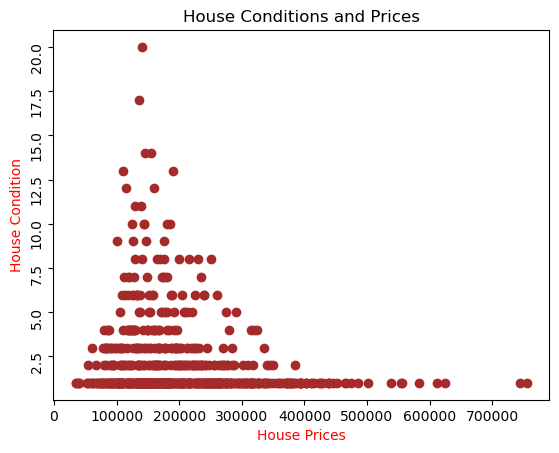

In [58]:
plt.scatter(price_by_condition["SalePrice"],price_by_condition["MSZoning"], color="brown")
plt.title("House Conditions and Prices")
plt.xlabel("House Prices", color='r')
plt.ylabel("House Condition", color='r')
plt.yticks(rotation=90)

plt.show()

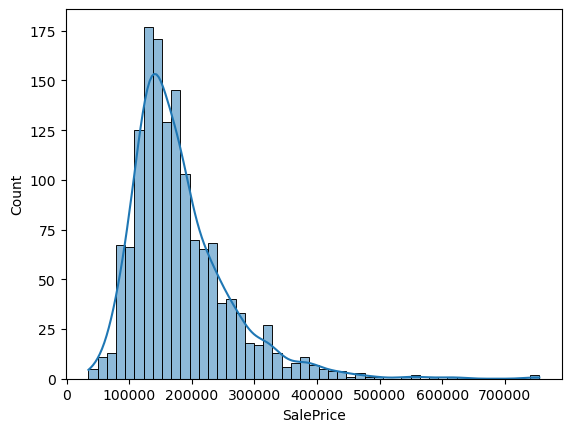

In [60]:
sns.histplot(df["SalePrice"], kde=True)
plt.show()

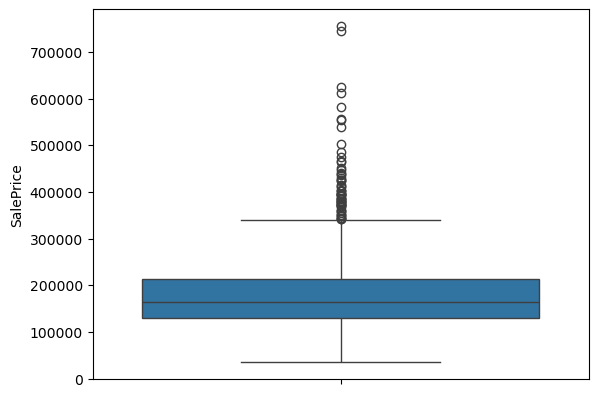

In [61]:
sns.boxplot(y=df["SalePrice"])

plt.show()

In [62]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

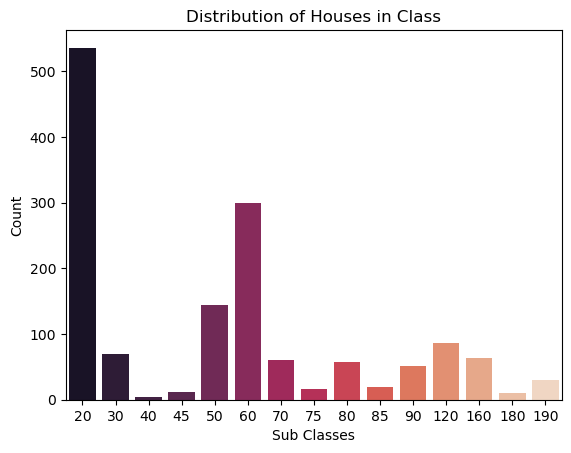

In [68]:
sns.countplot(data=df, x="MSSubClass", palette="rocket")
plt.title("Distribution of Houses in Class")
plt.xlabel("Sub Classes")
plt.ylabel("Count")

plt.show()

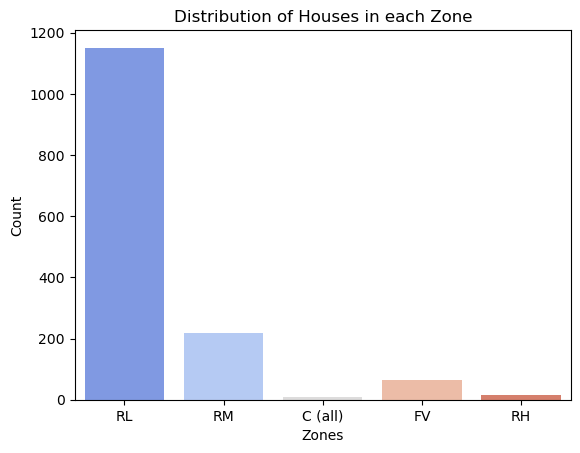

In [67]:
sns.countplot(data=df, x="MSZoning", palette="coolwarm")
plt.title("Distribution of Houses in each Zone")
plt.ylabel("Count")
plt.xlabel("Zones")

plt.show()

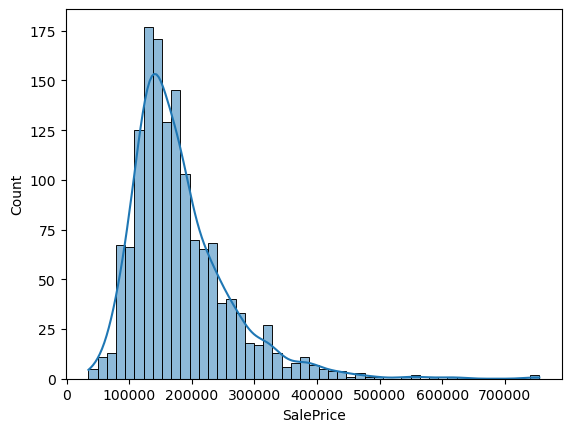

In [70]:
sns.histplot(data=df, x="SalePrice", kde=True)
plt.show()

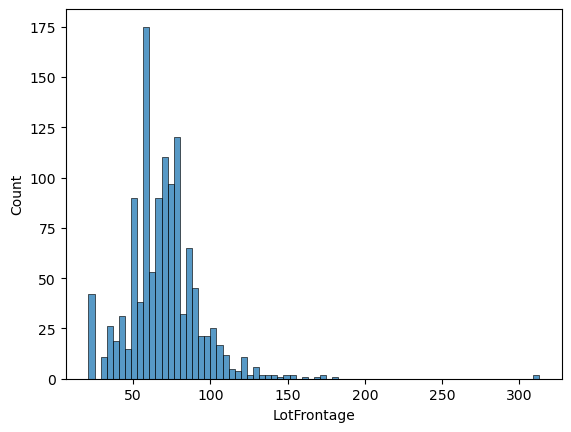

In [75]:
sns.histplot(data=df, x="LotFrontage")

plt.show()

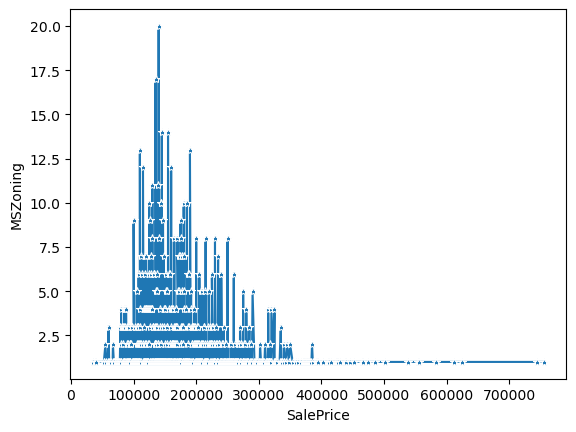

In [80]:
sns.lineplot(data=price_by_condition, x="SalePrice", y="MSZoning", marker="*")

plt.show()

In [84]:
price_by_year = df.groupby(["SalePrice", "YrSold"]).size().reset_index(name="count")

price_by_year

,SalePrice,YrSold,count
0,34900,2009,1
1,35311,2006,1
2,37900,2009,1
3,39300,2007,1
4,40000,2008,1
...,...,...,...
1077,582933,2009,1
1078,611657,2010,1
1079,625000,2006,1
1080,745000,2007,1


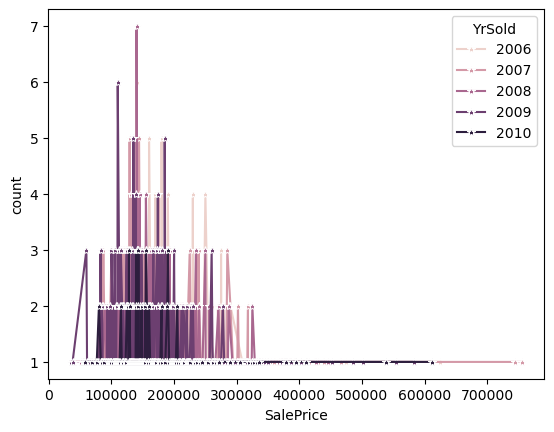

In [85]:
sns.lineplot(data=price_by_year, x="SalePrice", y="count", marker="*", hue="YrSold")

plt.show()

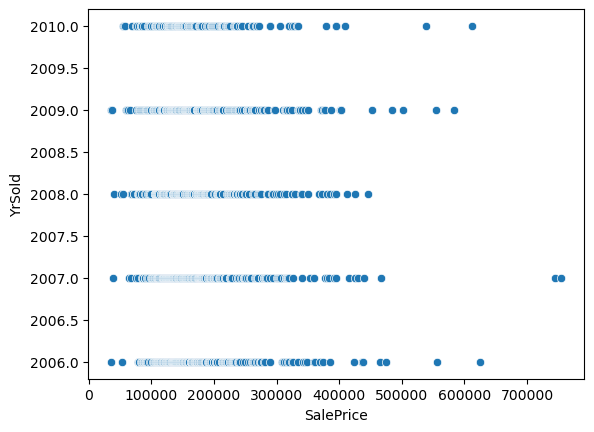

In [86]:
sns.scatterplot(price_by_year, x="SalePrice", y="YrSold")
plt.show()

In [88]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

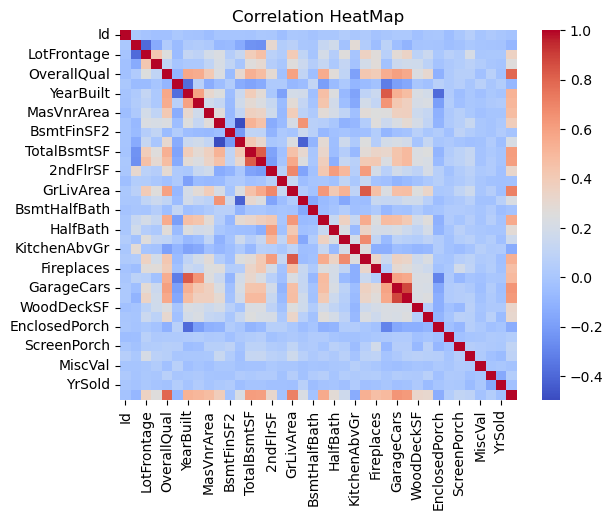

In [100]:
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation HeatMap")

plt.show()

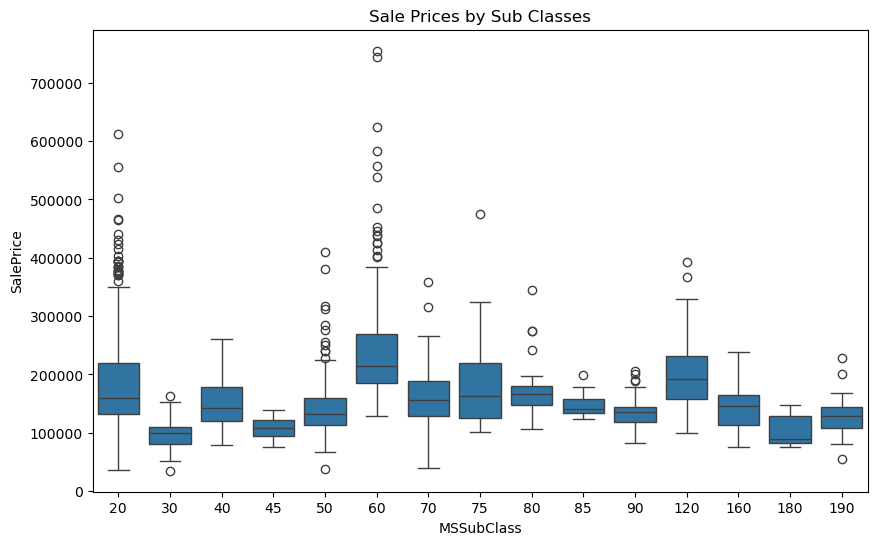

In [91]:
# Sale Prices according to Sub Classes
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="MSSubClass", y="SalePrice")
plt.title("Sale Prices by Sub Classes")

plt.show()

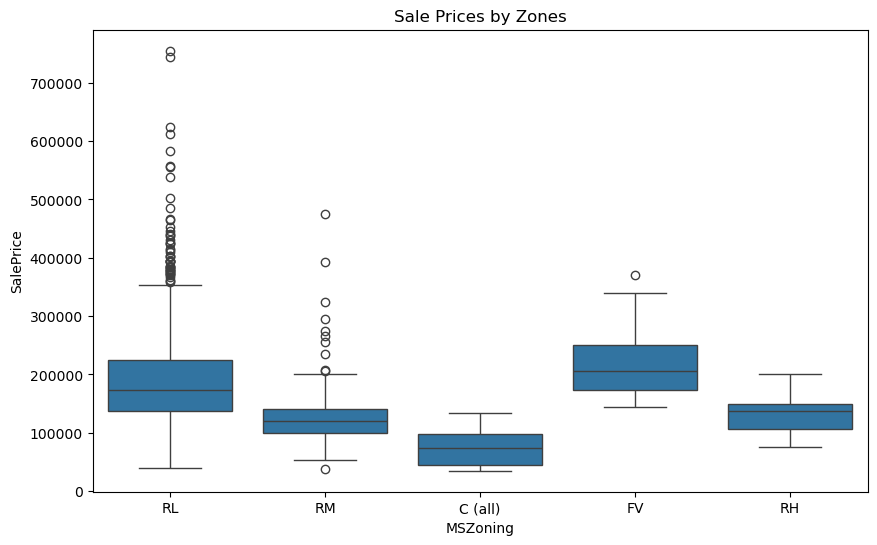

In [97]:
# Sale Prices by Zones
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="MSZoning", y="SalePrice")
plt.title("Sale Prices by Zones")

plt.show()

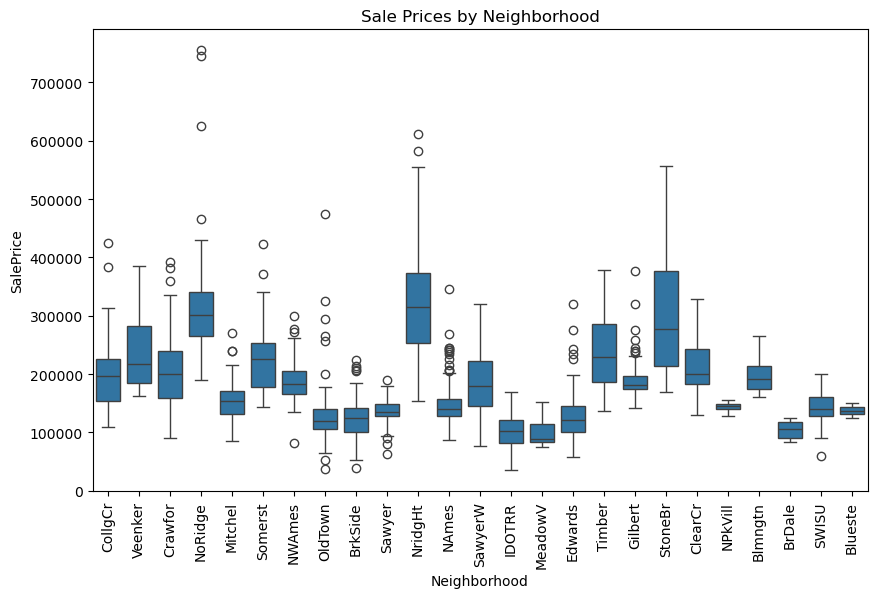

In [98]:
# Sale Price by Neighborhood
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Neighborhood", y="SalePrice")
plt.title("Sale Prices by Neighborhood")
plt.xticks(rotation=90)
plt.show()

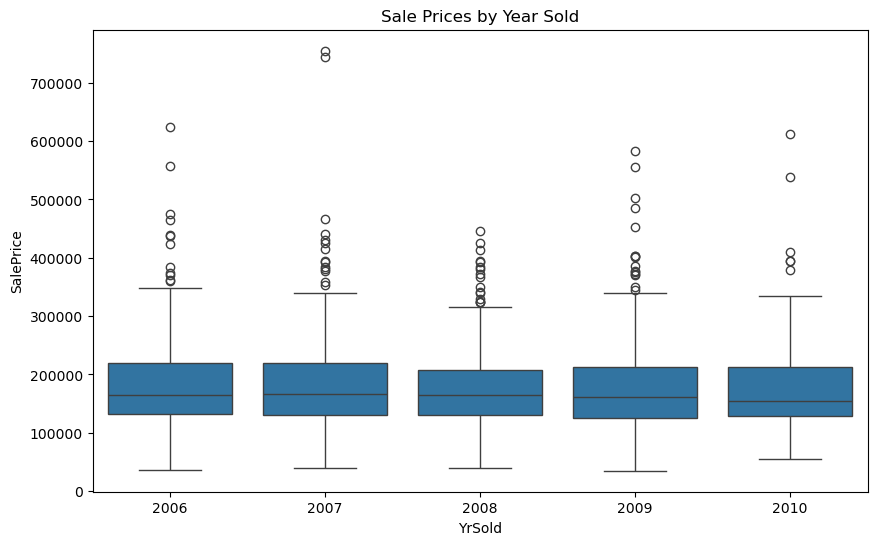

In [99]:
# Sale Price by Year Sold
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="YrSold", y="SalePrice")
plt.title("Sale Prices by Year Sold")

plt.show()

Tried out various methods of visualization with the data and it did not make any sense.

Used Boxplot because it is the only one that looked a little proper.
So, I'm going to study this again later to be able to explain it at all.

I don't know if you can comment ma'am >< 